# Naive Bayes

The goal of this problem is to build naive bayes (NB) models to classify whether each message is spam or not.

The data used in this problem provide frequencies of words for each message.

The column “label” is the target variable, indicating whether each message is spam or not (the label “ham” means that it is not a spam message.).

In [12]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [13]:
df = pd.read_csv("./datasets/spam_small.csv")
df.head()

,100,1000,150,150p,150ppm,16,18,1st,2000,2nd,...,weekly,well,went,win,word,work,would,yeah,yes,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,spam
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,spam


In [14]:
x = df.drop("label", axis=1)
y = df["label"]
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)


## Part 1: Bernoulli NB

To build a Bernoulli NB, if a certain word is used in a message, the values of the variables are set to 1; otherwise, they are set to 0.

1-(1) After the conversion, train a Bernoulli NB using training set (alpha=1). Prior probabilities of classes are proportional to ratios of classes in training set. Then, calculate the overall accuracy and accuracy values corresponding to each target class for the training and validation sets, respectively.

In [15]:
bnb = BernoulliNB(alpha=1)
bnb.fit(X_train, y_train)

y_train_pred = bnb.predict(X_train)
y_valid_pred = bnb.predict(X_valid)

train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)

print("Training accuracy:", train_accuracy)
print("Validation accuracy:", valid_accuracy)
print("Classification report (Training):\n", classification_report(y_train, y_train_pred))
print("Classification report (Validation):\n", classification_report(y_valid, y_valid_pred))


Training accuracy: 0.9591719378953422
Validation accuracy: 0.9528735632183908
Classification report (Training):
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      2919
        spam       0.97      0.77      0.86       559

    accuracy                           0.96      3478
   macro avg       0.96      0.88      0.92      3478
weighted avg       0.96      0.96      0.96      3478

Classification report (Validation):
               precision    recall  f1-score   support

         ham       0.96      0.99      0.97       732
        spam       0.91      0.78      0.84       138

    accuracy                           0.95       870
   macro avg       0.94      0.88      0.91       870
weighted avg       0.95      0.95      0.95       870



1-(2) Find the top 10 most probable words in each class according to the model trained in 1-(1) and summarize them with the probability of existence of words in the following tables.

In [18]:
feature_names = x.columns

log_prob = bnb.feature_log_prob_
prob = np.exp(log_prob)

spam_indices = np.argsort(log_prob[1])[-10:][::-1]
spam_words = feature_names[spam_indices]
spam_probs = prob[1][spam_indices]

ham_indices = np.argsort(log_prob[0])[-10:][::-1]
ham_words = feature_names[ham_indices]
ham_probs = prob[0][ham_indices]

spam_table = pd.DataFrame({'Term': spam_words, 'Probability': spam_probs})
ham_table = pd.DataFrame({'Term': ham_words, 'Probability': ham_probs})

print("Top 10 words in spam:\n", spam_table)
print("Top 10 words in ham:\n", ham_table)


Top 10 words in spam:
       Term  Probability
0     call     0.245989
1   mobile     0.128342
2      txt     0.105169
3  contact     0.098039
4     text     0.098039
5    claim     0.096257
6    prize     0.089127
7    reply     0.083779
8     free     0.081996
9       16     0.078431
Top 10 words in ham:
    Term  Probability
0   get     0.071893
1  ltgt     0.058884
2  know     0.057857
3  come     0.056488
4  like     0.055460
5    go     0.055460
6   got     0.054776
7  call     0.054091
8  time     0.045875
9   day     0.043821


1-(3) Find the top 10 words whose probability of existence high in spam, but low in ham according to the model trained in 1-(1). In addition, find the top 10 words whose probability of existence is high in ham, but low in spam.

In [19]:
diff_prob = prob[1] - prob[0]

high_spam_low_ham_indices = np.argsort(diff_prob)[-10:][::-1]
high_spam_low_ham_words = feature_names[high_spam_low_ham_indices]
high_spam_low_ham_probs = diff_prob[high_spam_low_ham_indices]

high_ham_low_spam_indices = np.argsort(diff_prob)[:10]
high_ham_low_spam_words = feature_names[high_ham_low_spam_indices]
high_ham_low_spam_probs = diff_prob[high_ham_low_spam_indices]

high_spam_low_ham_table = pd.DataFrame({'Term': high_spam_low_ham_words, 'Difference': high_spam_low_ham_probs})
high_ham_low_spam_table = pd.DataFrame({'Term': high_ham_low_spam_words, 'Difference': high_ham_low_spam_probs})

print("Top 10 words high in spam low in ham:\n", high_spam_low_ham_table)
print("Top 10 words high in ham low in spam:\n", high_ham_low_spam_table)


Top 10 words high in spam low in ham:
       Term  Difference
0     call    0.191898
1   mobile    0.125946
2      txt    0.103115
3    claim    0.095914
4  contact    0.094273
5    prize    0.088784
6     text    0.080579
7       16    0.077747
8    reply    0.074878
9  service    0.068834
Top 10 words high in ham low in spam:
     Term  Difference
0   ltgt   -0.057101
1   come   -0.052922
2    got   -0.047646
3   home   -0.039984
4    lor   -0.039642
5   like   -0.037635
6  going   -0.034436
7    day   -0.033125
8     go   -0.032288
9   good   -0.031626


## Part 2: Multinomial NB

2-(1) Train a multinomial NB using training set (x_train, y_train) (alpha=1). Prior probabilities of classes are proportional to ratios of classes in training set. Then calculate the overall accuracy and accuracy values corresponding to each target class for the training and validation sets, respectively.

In [20]:
mnb = MultinomialNB(alpha=1)
mnb.fit(X_train, y_train)

y_train_pred_mnb = mnb.predict(X_train)
y_valid_pred_mnb = mnb.predict(X_valid)

train_accuracy_mnb = accuracy_score(y_train, y_train_pred_mnb)
valid_accuracy_mnb = accuracy_score(y_valid, y_valid_pred_mnb)

print("Training accuracy (Multinomial):", train_accuracy_mnb)
print("Validation accuracy (Multinomial):", valid_accuracy_mnb)
print("Classification report (Training - Multinomial):\n", classification_report(y_train, y_train_pred_mnb))
print("Classification report (Validation - Multinomial):\n", classification_report(y_valid, y_valid_pred_mnb))


Training accuracy (Multinomial): 0.9617596319723979
Validation accuracy (Multinomial): 0.9528735632183908
Classification report (Training - Multinomial):
               precision    recall  f1-score   support

         ham       0.97      0.98      0.98      2919
        spam       0.91      0.84      0.88       559

    accuracy                           0.96      3478
   macro avg       0.94      0.91      0.93      3478
weighted avg       0.96      0.96      0.96      3478

Classification report (Validation - Multinomial):
               precision    recall  f1-score   support

         ham       0.97      0.98      0.97       732
        spam       0.88      0.82      0.85       138

    accuracy                           0.95       870
   macro avg       0.92      0.90      0.91       870
weighted avg       0.95      0.95      0.95       870



2-(2) Find the top 10 most probable words in each target according to the model trained in 2-(1) and summarize them with the probability of existence of words in the following tables.

In [21]:
log_prob_mnb = mnb.feature_log_prob_
prob_mnb = np.exp(log_prob_mnb)

spam_indices_mnb = np.argsort(log_prob_mnb[1])[-10:][::-1]
spam_words_mnb = feature_names[spam_indices_mnb]
spam_probs_mnb = prob_mnb[1][spam_indices_mnb]

ham_indices_mnb = np.argsort(log_prob_mnb[0])[-10:][::-1]
ham_words_mnb = feature_names[ham_indices_mnb]
ham_probs_mnb = prob_mnb[0][ham_indices_mnb]

spam_table_mnb = pd.DataFrame({'Term': spam_words_mnb, 'Probability': spam_probs_mnb})
ham_table_mnb = pd.DataFrame({'Term': ham_words_mnb, 'Probability': ham_probs_mnb})

print("Top 10 words in spam (Multinomial):\n", spam_table_mnb)
print("Top 10 words in ham (Multinomial):\n", ham_table_mnb)


Top 10 words in spam (Multinomial):
       Term  Probability
0     call     0.059791
1   mobile     0.029695
2     text     0.024880
3      txt     0.024077
4    claim     0.022071
5  contact     0.022071
6    prize     0.021669
7     free     0.020465
8    reply     0.019663
9       16     0.017657
Top 10 words in ham (Multinomial):
    Term  Probability
0  ltgt     0.031045
1   get     0.030635
2  know     0.024344
3  come     0.024070
4  like     0.023933
5    go     0.023796
6  call     0.022429
7   got     0.022429
8  time     0.019147
9   lor     0.018600


2-(3) Find the top 10 words whose probability of existence is high in spam but in low in ham according to the model trained in 2-(1). In addition, find the top 10 words whose probability of existence is high in ham but low in spam.

In [22]:
diff_prob_mnb = prob_mnb[1] - prob_mnb[0]

high_spam_low_ham_indices_mnb = np.argsort(diff_prob_mnb)[-10:][::-1]
high_spam_low_ham_words_mnb = feature_names[high_spam_low_ham_indices_mnb]
high_spam_low_ham_probs_mnb = diff_prob_mnb[high_spam_low_ham_indices_mnb]

high_ham_low_spam_indices_mnb = np.argsort(diff_prob_mnb)[:10]
high_ham_low_spam_words_mnb = feature_names[high_ham_low_spam_indices_mnb]
high_ham_low_spam_probs_mnb = diff_prob_mnb[high_ham_low_spam_indices_mnb]

high_spam_low_ham_table_mnb = pd.DataFrame({'Term': high_spam_low_ham_words_mnb, 'Difference': high_spam_low_ham_probs_mnb})
high_ham_low_spam_table_mnb = pd.DataFrame({'Term': high_ham_low_spam_words_mnb, 'Difference': high_ham_low_spam_probs_mnb})

print("Top 10 words high in spam low in ham (Multinomial):\n", high_spam_low_ham_table_mnb)
print("Top 10 words high in ham low in spam (Multinomial):\n", high_ham_low_spam_table_mnb)


Top 10 words high in spam low in ham (Multinomial):
       Term  Difference
0     call    0.037362
1   mobile    0.028738
2      txt    0.023256
3    claim    0.021934
4    prize    0.021533
5  contact    0.020566
6     text    0.017768
7       16    0.017383
8    reply    0.015834
9  service    0.015778
Top 10 words high in ham low in spam (Multinomial):
     Term  Difference
0   ltgt   -0.030644
1   come   -0.023267
2    got   -0.020824
3   like   -0.019920
4     go   -0.018580
5    lor   -0.018198
6   home   -0.016557
7    day   -0.015782
8   know   -0.015515
9  going   -0.014925


# 2. Decision tree

In this question, you have to train decision tree models to classify whether the client has subscribed a term deposit or not ("y"). If the client has subscribed a term deposit, the target variable would be 1, or 0 otherwise.

* Y: dependent variable, indicating whether the client has subscribed a term deposit (binary: yes or no)
* age: age in years
* job: type of job (nominal: 11 categories)
* marital: marital status (nominal: 3 categories)
* education: education level (nominal: 4 categories)
* default: has credit in default? (binary: yes or no)
* balance: average yearly balance in euros
* housing: has housing loan? (binary: yes or no)
* loan: has personal loan? (binary: yes or no)
* contact: contact communication type (nominal: 3 categories)
* day: last contact day of the month
* month: last contact month of year
* duration: last contact duration, in seconds
* campaign: number of contacts performed during this campaign and for this client including last contact
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric: -1 means that client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client
* poutcome: outcome of the previous marketing campaign (nominal: 4 categories)

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [42]:
df = pd.read_csv("./datasets/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
x = df.drop("y", axis=1)
y = df["y"]

In [44]:
x = pd.get_dummies(x, columns=list(x.select_dtypes("object").columns), drop_first=True)

In [45]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y)

(1) Train decision tree models by different maximum depth {1, 2, 3, 4, 5} with min_samples_leaf=10 and the Gini impurity for the criterion to determine the best split, using a training set (x_train, y_train). Then, calculate the accuracy of the models using a validation set (x_valid, y_valid) for overall samples and individual classes, and fill the following table.

In [46]:
depths = [1, 2, 3, 4, 5]
results = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=10, criterion='gini', random_state=42)
    dt.fit(X_train, y_train)
    y_valid_pred = dt.predict(X_valid)
    overall_accuracy = accuracy_score(y_valid, y_valid_pred)
    class_accuracies = classification_report(y_valid, y_valid_pred, output_dict=True)['accuracy']
    results.append({'Depth': depth, 'Overall Accuracy': overall_accuracy, 'Class Accuracies': class_accuracies})

results_df = pd.DataFrame(results)
print(results_df)


/opt/anaconda3/envs/dmclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/

   Depth  Overall Accuracy  Class Accuracies
0      1          0.883003          0.883003
1      2          0.883003          0.883003
2      3          0.883003          0.883003
3      4          0.883003          0.883003
4      5          0.883003          0.883003


/opt/anaconda3/envs/dmclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(3) Draw the trained tree with feature names when the maximum depth is set to 3.

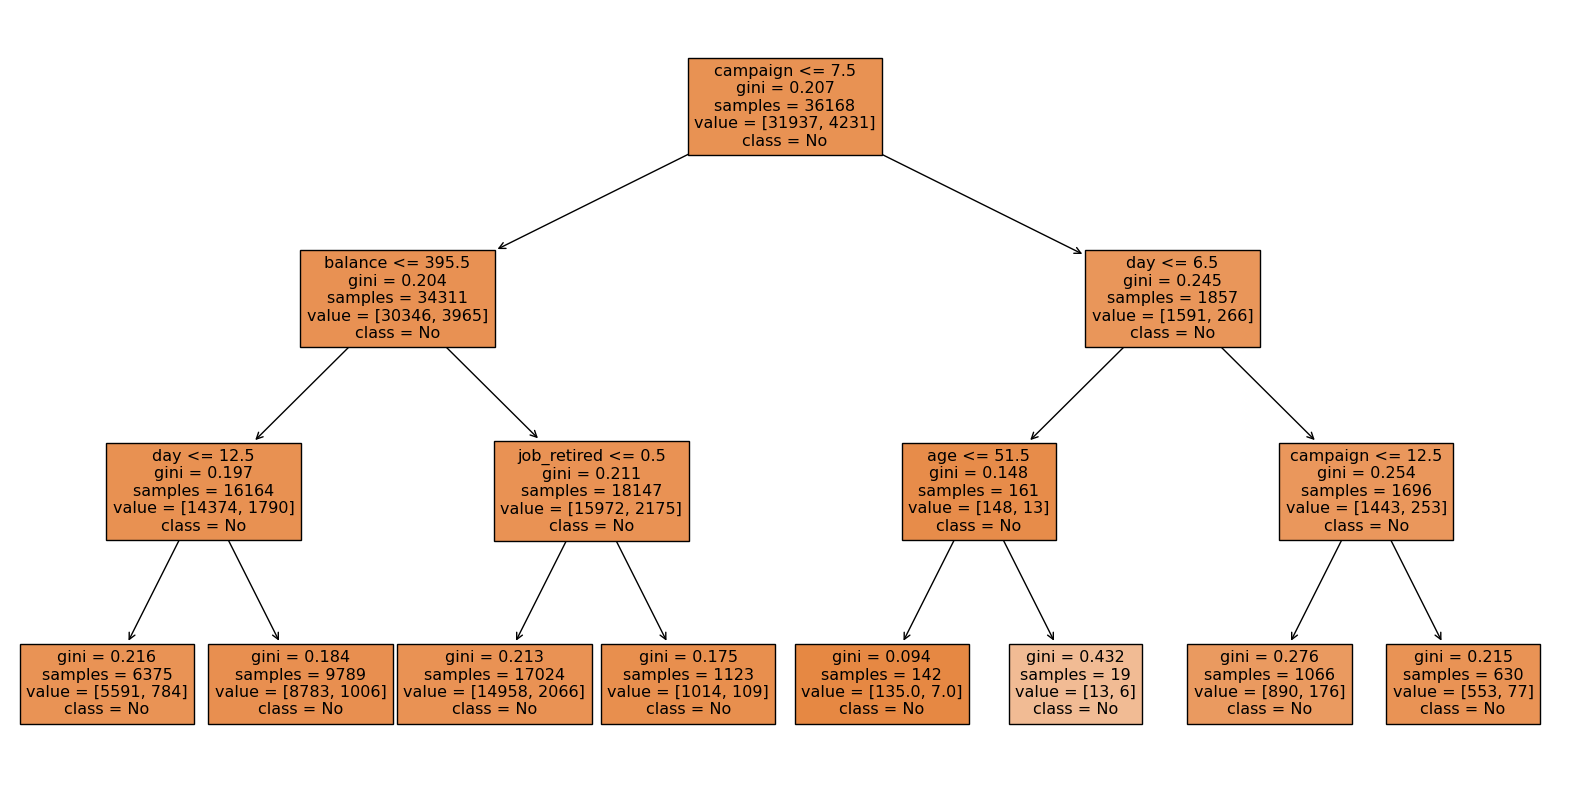

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dt_max_depth_3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, criterion='gini', random_state=42)
dt_max_depth_3.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_max_depth_3, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


(4) Train decision tree models by different maximum depth (1, 2, 3, 4, 5) with min_samples_leaf = 10 and the entropy impurity for the criterion to determine the best split, using a training set (x_train, y_train). Then, calculate the accuracy of the models using a validation set (x_valid, y_valid) for overall samples and individual classes, and fill the following table.

In [48]:
results_entropy = []

for depth in depths:
    dt_entropy = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=10, criterion='entropy', random_state=42)
    dt_entropy.fit(X_train, y_train)
    y_valid_pred_entropy = dt_entropy.predict(X_valid)
    overall_accuracy_entropy = accuracy_score(y_valid, y_valid_pred_entropy)
    class_accuracies_entropy = classification_report(y_valid, y_valid_pred_entropy, output_dict=True)['accuracy']
    results_entropy.append({'Depth': depth, 'Overall Accuracy': overall_accuracy_entropy, 'Class Accuracies': class_accuracies_entropy})
results_entropy_df = pd.DataFrame(results_entropy)
print(results_entropy_df)


/opt/anaconda3/envs/dmclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/

   Depth  Overall Accuracy  Class Accuracies
0      1          0.883003          0.883003
1      2          0.883003          0.883003
2      3          0.883003          0.883003
3      4          0.883003          0.883003
4      5          0.883003          0.883003


/opt/anaconda3/envs/dmclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 3. k-means clustering

This problem uses data generated from several normal distributions to apply k-means clustering.

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [50]:
df = pd.read_csv("./datasets/syn_unbalance.csv", header=None)
df.shape

(6500, 2)

In [51]:
x = df.to_numpy()

(1) Select randomly k(=3, ..., 10) samples from the given dataset and use them as initial centroids. This procedure is repeated for 10 times for each k. You need to report the average and standard deviation of silhouette coefficient values of 10 iterations for each k.

In [53]:


# Load the dfset

df_array = df.values

k_values = range(3, 11)
results_random = []

for k in k_values:
    silhouette_scores = []
    for _ in range(10):
        initial_centroids_indices = np.random.choice(df_array.shape[0], k, replace=False)
        initial_centroids = df_array[initial_centroids_indices]
        kmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1)
        kmeans.fit(df_array)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(df_array, labels))
    results_random.append({
        'k': k, 
        'Silhouette Coefficient (Avg)': np.mean(silhouette_scores), 
        'Silhouette Coefficient (Std Dev)': np.std(silhouette_scores)
    })

results_random_df = pd.DataFrame(results_random)
print(results_random_df)


    k  Silhouette Coefficient (Avg)  Silhouette Coefficient (Std Dev)
0   3                      0.645909                          0.000444
1   4                      0.689135                          0.175219
2   5                      0.590079                          0.112944
3   6                      0.614442                          0.080296
4   7                      0.516590                          0.071683
5   8                      0.547371                          0.097616
6   9                      0.523318                          0.089706
7  10                      0.413036                          0.082100


(2) Use the default initialization strategy "k-means++". This procedure is repeated for 10 times. Then, calculate the average and standard deviation silhouette coefficient values of 10 iterations for each k.

In [55]:
results_kmeanspp = []

for k in k_values:
    silhouette_scores = []
    for _ in range(10):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
        kmeans.fit(df_array)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(df_array, labels))
    results_kmeanspp.append({
        'k': k, 
        'Silhouette Coefficient (Avg)': np.mean(silhouette_scores), 
        'Silhouette Coefficient (Std Dev)': np.std(silhouette_scores)
    })

results_kmeanspp_df = pd.DataFrame(results_kmeanspp)
print(results_kmeanspp_df)


    k  Silhouette Coefficient (Avg)  Silhouette Coefficient (Std Dev)
0   3                      0.647240                      1.110223e-16
1   4                      0.854797                      0.000000e+00
2   5                      0.831663                      1.540699e-04
3   6                      0.839816                      7.182503e-05
4   7                      0.850017                      2.043292e-04
5   8                      0.857757                      0.000000e+00
6   9                      0.690801                      1.050747e-03
7  10                      0.522543                      4.879769e-03


(3) Draw scatter plots for the given data with initial centroids and final centroids for the worst and best number of clusters among k=3,...,10 in (1) in terms of silhouette coefficient. The final centroids should be marked as blue "X".

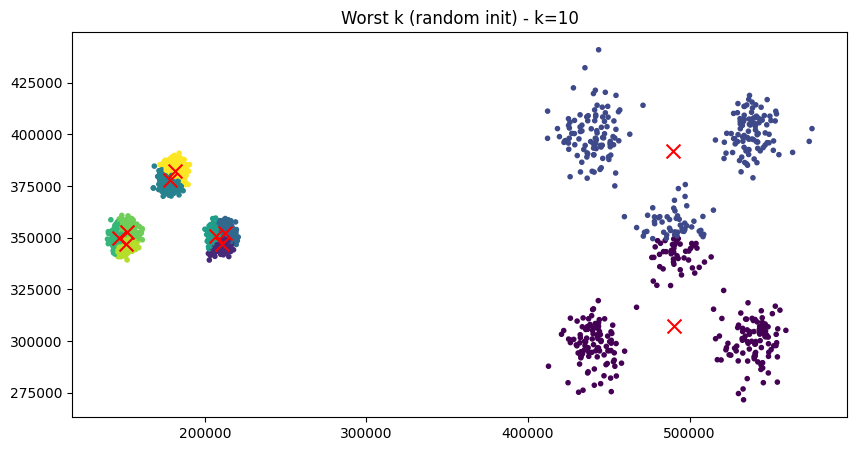

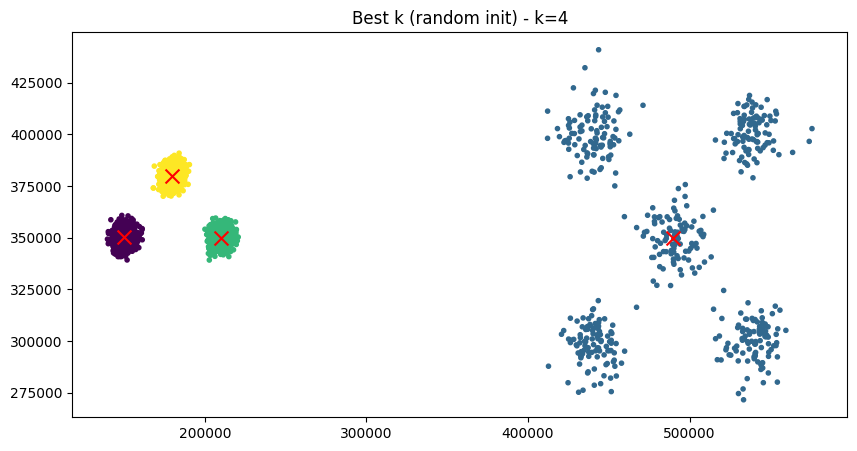

In [58]:
import matplotlib.pyplot as plt

worst_k_random = int(results_random_df.loc[results_random_df['Silhouette Coefficient (Avg)'].idxmin()]['k'])
best_k_random = int(results_random_df.loc[results_random_df['Silhouette Coefficient (Avg)'].idxmax()]['k'])

kmeans_worst_random = KMeans(n_clusters=worst_k_random, init='random', n_init=10, random_state=42)
kmeans_worst_random.fit(df_array)
labels_worst_random = kmeans_worst_random.labels_
centroids_worst_random = kmeans_worst_random.cluster_centers_

plt.figure(figsize=(10, 5))
plt.scatter(df_array[:, 0], df_array[:, 1], c=labels_worst_random, cmap='viridis', marker='.')
plt.scatter(centroids_worst_random[:, 0], centroids_worst_random[:, 1], marker='x', s=100, color='red')
plt.title(f'Worst k (random init) - k={worst_k_random}')
plt.show()

kmeans_best_random = KMeans(n_clusters=best_k_random, init='random', n_init=10, random_state=42)
kmeans_best_random.fit(df_array)
labels_best_random = kmeans_best_random.labels_
centroids_best_random = kmeans_best_random.cluster_centers_

plt.figure(figsize=(10, 5))
plt.scatter(df_array[:, 0], df_array[:, 1], c=labels_best_random, cmap='viridis', marker='.')
plt.scatter(centroids_best_random[:, 0], centroids_best_random[:, 1], marker='x', s=100, color='red')
plt.title(f'Best k (random init) - k={best_k_random}')
plt.show()


(4) Draw scatter plots for the worst and best number of clusters among k=3,...,10 of question (2) in the same way as in question (3). Do not need to plot initial centroids.

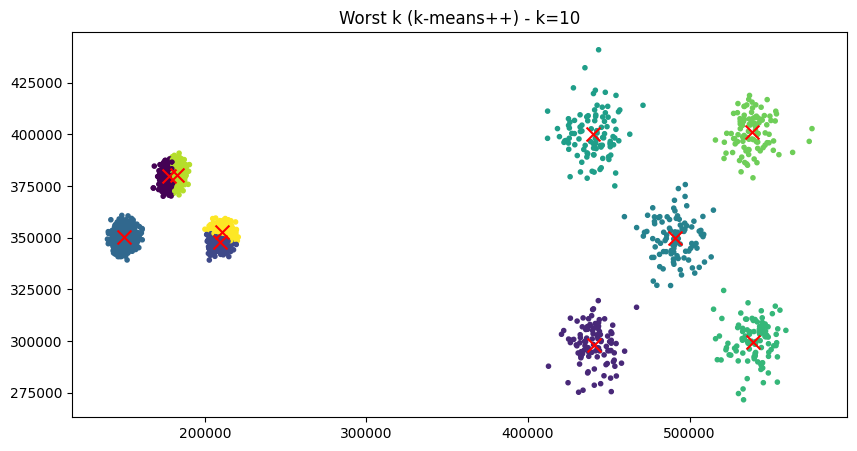

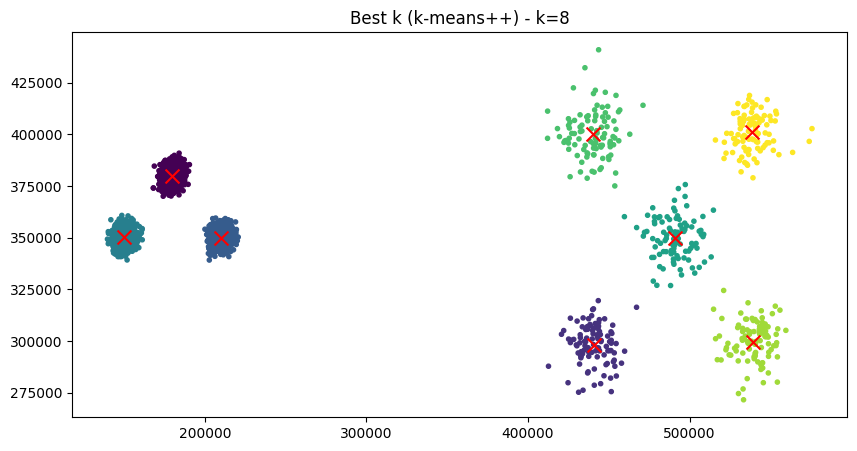

In [60]:
worst_k_kmeanspp = int(results_kmeanspp_df.loc[results_kmeanspp_df['Silhouette Coefficient (Avg)'].idxmin()]['k'])
best_k_kmeanspp = int(results_kmeanspp_df.loc[results_kmeanspp_df['Silhouette Coefficient (Avg)'].idxmax()]['k'])

kmeans_worst_pp = KMeans(n_clusters=worst_k_kmeanspp, init='k-means++', n_init=10, random_state=42)
kmeans_worst_pp.fit(df_array)
labels_worst_pp = kmeans_worst_pp.labels_
centroids_worst_pp = kmeans_worst_pp.cluster_centers_

plt.figure(figsize=(10, 5))
plt.scatter(df_array[:, 0], df_array[:, 1], c=labels_worst_pp, cmap='viridis', marker='.')
plt.scatter(centroids_worst_pp[:, 0], centroids_worst_pp[:, 1], marker='x', s=100, color='red')
plt.title(f'Worst k (k-means++) - k={worst_k_kmeanspp}')
plt.show()

kmeans_best_pp = KMeans(n_clusters=best_k_kmeanspp, init='k-means++', n_init=10, random_state=42)
kmeans_best_pp.fit(df_array)
labels_best_pp = kmeans_best_pp.labels_
centroids_best_pp = kmeans_best_pp.cluster_centers_

plt.figure(figsize=(10, 5))
plt.scatter(df_array[:, 0], df_array[:, 1], c=labels_best_pp, cmap='viridis', marker='.')
plt.scatter(centroids_best_pp[:, 0], centroids_best_pp[:, 1], marker='x', s=100, color='red')
plt.title(f'Best k (k-means++) - k={best_k_kmeanspp}')
plt.show()
